In [1]:
!pip install nltk gensim scikit-learn pandas numpy matplotlib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


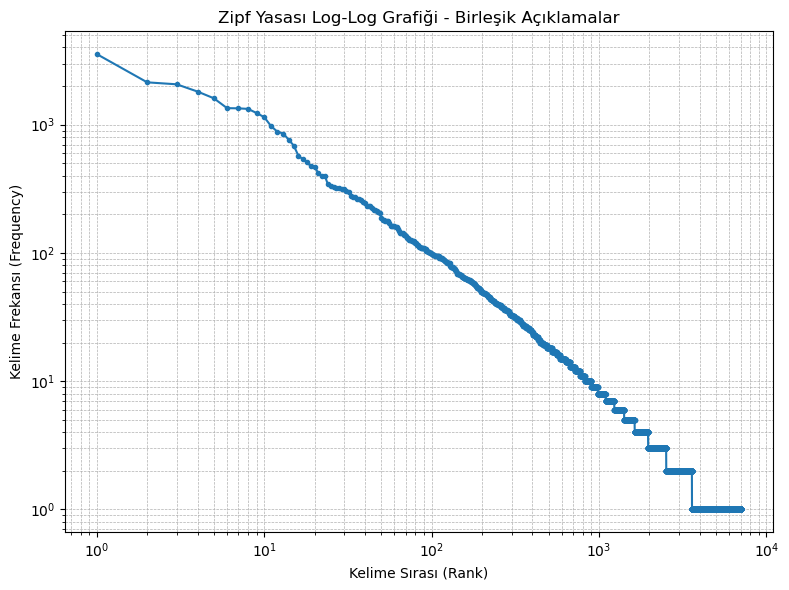

Toplam belge sayısı: 800
Eşsiz kelime sayısı: 7038
Toplam kelime sayısı: 73710
Veri seti Zipf analizi için yeterlidir.


In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Birleştirilmiş dosyayı yükle
df = pd.read_csv("veri_800.csv")

# Metinleri birleştir ve temizle
all_text = " ".join(df["review"].astype(str).tolist()).lower()
tokens = word_tokenize(all_text)
tokens = [token for token in tokens if token.isalpha()]  # sadece harflerden oluşan kelimeler

# Frekansları say
word_freq = Counter(tokens)
sorted_freq = sorted(word_freq.values(), reverse=True)

# Log-log grafiği (Zipf)
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Birleşik Açıklamalar")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Kelime Frekansı (Frequency)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Veri boyutu bilgisi
print(f"Toplam belge sayısı: {len(df)}")
print(f"Eşsiz kelime sayısı: {len(word_freq)}")
print(f"Toplam kelime sayısı: {len(tokens)}")

if len(tokens) < 1000:
    print("Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("Veri seti Zipf analizi için yeterlidir.")

In [9]:
df_birlesik = df.dropna()
df_birlesik = df.reset_index(drop=True)

# İlk 5 veri örneği
df_birlesik.head()

,review,game_name
0,2022 Simply incredible. With essential patches...,Total War: WARHAMMER III
1,09/05/2024 - Game 100% unplayable09/06/2024 - ...,"Warhammer 40,000: Space Marine 2"
2,Black Myth: Wukong Beat the game with multiple...,Black Myth: Wukong
3,2022 Average Fromsoftware enjoyer:⠀⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠛...,ELDEN RING
4,"2018 This is an extremely hardcore, skill-base...",Counter-Strike 2


In [13]:
# Lowercasing ve HTML/Özel Karakter Temizliği
import re
from bs4 import BeautifulSoup

def clean_text(text):
    # HTML etiketlerini kaldır (gerekirse)
    text = BeautifulSoup(text, "html.parser").get_text()
    # Özel karakterleri kaldır
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Küçük harfe çevir
    return text.lower()

df_birlesik["cleaned"] = df_birlesik["review"].apply(clean_text)

# Örnek dönüşüm
print("Örnek orijinal metin:\n", df_birlesik["review"].iloc[0])
print("\nTemizlenmiş:\n", df_birlesik["cleaned"].iloc[0])

Örnek orijinal metin:
 2022 Simply incredible. With essential patches of first months and addition of Immortal Empires, this game is simply breathtaking!

Temizlenmiş:
 2022 simply incredible with essential patches of first months and addition of immortal empires this game is simply breathtaking


C:\Users\eren\AppData\Local\Temp\ipykernel_16784\3456799796.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [15]:
# Tokenization ve Noktalama İşareti Kaldırma
from nltk.tokenize import word_tokenize
import string

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]  # sadece alfabetik kelimeler
    return tokens

df_birlesik["tokens"] = df_birlesik["cleaned"].apply(tokenize)

# Örnek
print("Tokenized örnek:", df_birlesik["tokens"].iloc[0])

Tokenized örnek: ['simply', 'incredible', 'with', 'essential', 'patches', 'of', 'first', 'months', 'and', 'addition', 'of', 'immortal', 'empires', 'this', 'game', 'is', 'simply', 'breathtaking']


In [17]:
# Stop Word Removal
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [t for t in tokens if t not in stop_words]

df_birlesik["no_stopwords"] = df_birlesik["tokens"].apply(remove_stopwords)

# Örnek
print("Stopword çıkarı:", df_birlesik["no_stopwords"].iloc[0])

Stopword çıkarı: ['simply', 'incredible', 'essential', 'patches', 'first', 'months', 'addition', 'immortal', 'empires', 'game', 'simply', 'breathtaking']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]

df_birlesik["lemmatized"] = df_birlesik["no_stopwords"].apply(lemmatize)

# Örnek
print("Lemmatized:", df_birlesik["lemmatized"].iloc[0])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized: ['simply', 'incredible', 'essential', 'patch', 'first', 'month', 'addition', 'immortal', 'empire', 'game', 'simply', 'breathtaking']


In [21]:
# Sitemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem(tokens):
    return [stemmer.stem(t) for t in tokens]

df_birlesik["stemmed"] = df_birlesik["no_stopwords"].apply(stem)

# Örnek
print("Stemmed:", df_birlesik["stemmed"].iloc[0])

Stemmed: ['simpli', 'incred', 'essenti', 'patch', 'first', 'month', 'addit', 'immort', 'empir', 'game', 'simpli', 'breathtak']


In [25]:
# Önişlenmiş verileri Tekrar string'e çevirerek kaydet
df_birlesik["lemmatized_text"] = df_birlesik["lemmatized"].apply(lambda x: " ".join(x))
df_birlesik["stemmed_text"] = df_birlesik["stemmed"].apply(lambda x: " ".join(x))

df_birlesik[["review", "lemmatized_text"]].to_csv("lemmatized.csv", index=False)
df_birlesik[["review", "stemmed_text"]].to_csv("stemmed.csv", index=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


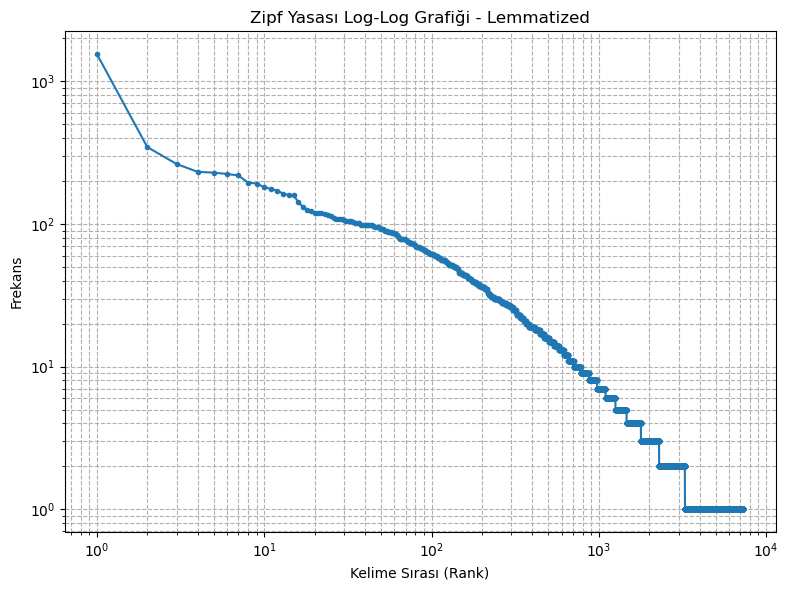

Toplam metin sayısı: 800
Toplam kelime sayısı: 40247
Eşsiz kelime sayısı: 7296
Veri seti Zipf analizi için yeterlidir.


In [27]:
# lemmatized.csv Zipf Grafiği ve Değerlendirme
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Veri yükle
lem_df = pd.read_csv("lemmatized.csv")

# Tüm metinleri birleştir ve tokenize et
all_text = " ".join(lem_df["lemmatized_text"].astype(str).tolist())
tokens = word_tokenize(all_text)
tokens = [t for t in tokens if t.isalpha()]

# Frekans sayımı
freq = Counter(tokens)
sorted_freq = sorted(freq.values(), reverse=True)

# Zipf log-log grafiği
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Lemmatized")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Frekans")
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()

print(f"Toplam metin sayısı: {len(lem_df)}")
print(f"Toplam kelime sayısı: {len(tokens)}")
print(f"Eşsiz kelime sayısı: {len(freq)}")

if len(tokens) < 1000:
    print("Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("Veri seti Zipf analizi için yeterlidir.")

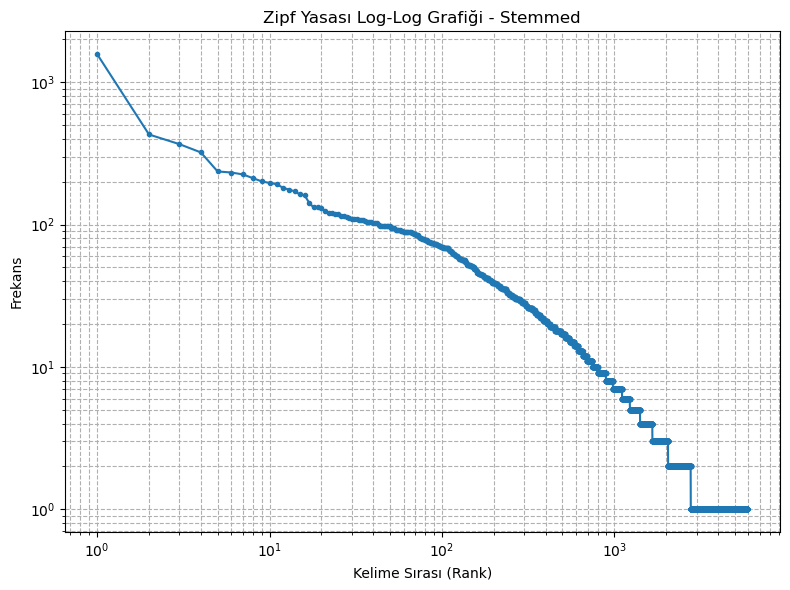

Toplam metin sayısı: 800
Toplam kelime sayısı: 40247
Eşsiz kelime sayısı: 5924
Veri seti Zipf analizi için yeterlidir.


In [29]:
# stemmed.csv Zipf Grafiği ve Değerlendirme
# Veri yükle
stem_df = pd.read_csv("stemmed.csv")

# Tüm metinleri birleştir ve tokenize et
all_text = " ".join(stem_df["stemmed_text"].astype(str).tolist())
tokens = word_tokenize(all_text)
tokens = [t for t in tokens if t.isalpha()]

# Frekans sayımı
freq = Counter(tokens)
sorted_freq = sorted(freq.values(), reverse=True)

# Zipf log-log grafiği
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Stemmed")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Frekans")
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()

print(f"Toplam metin sayısı: {len(stem_df)}")
print(f"Toplam kelime sayısı: {len(tokens)}")
print(f"Eşsiz kelime sayısı: {len(freq)}")

if len(tokens) < 1000:
    print("Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("Veri seti Zipf analizi için yeterlidir.")

In [31]:
# Lemmatized TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Lemmatized veri yükle
lem_df = pd.read_csv("lemmatized.csv")

# Boş (NaN) satırları temizle
lem_df["lemmatized_text"] = lem_df["lemmatized_text"].fillna("")

# TF-IDF hesapla
vectorizer_lem = TfidfVectorizer()
X_lem = vectorizer_lem.fit_transform(lem_df["lemmatized_text"])

# Kaydet
tfidf_lem_df = pd.DataFrame(X_lem.toarray(), columns=vectorizer_lem.get_feature_names_out())
tfidf_lem_df.to_csv("tfidf_lemmatized.csv", index=False)

In [33]:
# Stemmed TF-IDF
# Stemmed veri yükle
stem_df = pd.read_csv("stemmed.csv")

# Boş (NaN) satırları temizle
stem_df["stemmed_text"] = stem_df["stemmed_text"].fillna("")

# TF-IDF hesapla
vectorizer_stem = TfidfVectorizer()
X_stem = vectorizer_stem.fit_transform(stem_df["stemmed_text"])

# Kaydet
tfidf_stem_df = pd.DataFrame(X_stem.toarray(), columns=vectorizer_stem.get_feature_names_out())
tfidf_stem_df.to_csv("tfidf_stemmed.csv", index=False)

In [35]:
# Word2Vec Parametre Setleri ve Eğitim Döngüsü
from gensim.models import Word2Vec
import pandas as pd
import os

# Klasör oluşturulmamışsa oluştur
os.makedirs("models", exist_ok=True)

# 🧪 Parametre kombinasyonları (8 adet)
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300},
]

# Her veri tipi için ayrı ayrı (lemmatized, stemmed)
for mode in ["lemmatized", "stemmed"]:
    path = f"{mode}.csv"
    df = pd.read_csv(path)
    
    text_col = f"{mode}_text"
    df[text_col] = df[text_col].fillna("")
    sentences = df[text_col].apply(lambda x: x.split()).tolist()

    for params in parameters:
        model_type = params["model_type"]
        sg = 1 if model_type == "skipgram" else 0
        window = params["window"]
        vector_size = params["vector_size"]

        # Model ismi örneği: word2vec_lemmatized_cbow_win2_dim100.model
        model_name = f"word2vec_{mode}_{model_type}_win{window}_dim{vector_size}"
        model_path = f"./models/{model_name}.model"

        print(f"\n Model eğitiliyor: {model_name}")

        #  Eğitim
        model = Word2Vec(
            sentences=sentences,
            vector_size=vector_size,
            window=window,
            sg=sg,
            min_count=1
        )

        # Kaydet
        model.save(model_path)
        print(f" Kaydedildi: {model_path}")

        # Örnek kelime benzerliği
        try:
            print(f"'soup' kelimesine en benzer 5 kelime:")
            for word, score in model.wv.most_similar("game", topn=5):
                print(f" - {word}: {score:.4f}")
        except KeyError:
            print("'game' kelimesi modelde bulunamadı.")


 Model eğitiliyor: word2vec_lemmatized_cbow_win2_dim100
 Kaydedildi: ./models/word2vec_lemmatized_cbow_win2_dim100.model
'soup' kelimesine en benzer 5 kelime:
 - player: 0.9988
 - time: 0.9988
 - get: 0.9987
 - also: 0.9986
 - even: 0.9986

 Model eğitiliyor: word2vec_lemmatized_skipgram_win2_dim100
 Kaydedildi: ./models/word2vec_lemmatized_skipgram_win2_dim100.model
'soup' kelimesine en benzer 5 kelime:
 - fun: 0.9986
 - great: 0.9983
 - feel: 0.9982
 - really: 0.9982
 - year: 0.9982

 Model eğitiliyor: word2vec_lemmatized_cbow_win4_dim100
 Kaydedildi: ./models/word2vec_lemmatized_cbow_win4_dim100.model
'soup' kelimesine en benzer 5 kelime:
 - player: 0.9998
 - also: 0.9998
 - get: 0.9998
 - time: 0.9998
 - even: 0.9998

 Model eğitiliyor: word2vec_lemmatized_skipgram_win4_dim100
 Kaydedildi: ./models/word2vec_lemmatized_skipgram_win4_dim100.model
'soup' kelimesine en benzer 5 kelime:
 - year: 0.9952
 - ive: 0.9951
 - best: 0.9948
 - ever: 0.9947
 - fun: 0.9946

 Model eğitiliyor: wo

In [39]:
df = pd.read_csv("veri_800.csv").dropna().reset_index(drop=True)

# İlk 10 açıklamayı gösterelim
for i in range(5):
    print(f"Satır {i}:\n{df['review'].iloc[i]}\n")

Satır 0:
2022 Simply incredible. With essential patches of first months and addition of Immortal Empires, this game is simply breathtaking!

Satır 1:
09/05/2024 - Game 100% unplayable09/06/2024 - Game 100% unplayable09/07/2024 - Game 100% unplayable.09/08/2024 - Game 100% unplayable.09/09/2024 - Official release date. Still 100% unplayable.09/10/2024 - Game 100% unplayable.09/11/2024 - Game 100% unplayable.09/12/2024 - Game 100% unplayable.09/13/2024 - Game 100% unplayable.09/14/2024 - Game 100% unplayable.09/15/2024 - Game 100% unplayable.09/16/2024 - Game 100% unplayable.09/17/2024 - Game 100% unplayable.09/18/2024 - Game 100% unplayable.09/19/2024 - Game 100% unplayable.09/20/2024 - Game 100% unplayable. STILL does not launch properly and freezes at launch OR otherwise the gameplay freezes every 10 seconds. I got this game on cdkeys so I can't even get a refund either. Simply amazing.I also submitted a ticket on the Focus website and they responded to my ticket saying that they are 

In [43]:
metin_sec = 0
input_index = df["review"].iloc[metin_sec]
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_lemma(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return " ".join(tokens)

giris_metni = preprocess_lemma(input_index)
print("Seçilen giriş metni:")
print(giris_metni)

Seçilen giriş metni:
simply incredible essential patch first month addition immortal empire game simply breathtaking


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# 1. Veri setini yükle
df = pd.read_csv("lemmatized.csv")
df["lemmatized_text"] = df["lemmatized_text"].fillna("")

# 2. TF-IDF modeli
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["lemmatized_text"])

# 3. Giriş metni: seçilen metin

input_vec = tfidf_matrix[metin_sec]
input_text = df["lemmatized_text"].iloc[metin_sec]

# 4. Cosine similarity tüm veri ile
cosine_sim = cosine_similarity(input_vec, tfidf_matrix)[0]

# 5. En benzer 5 metni bul (kendisi dahil olur)
top5_idx = cosine_sim.argsort()[-5:][::-1]

# 6. Giriş metnindeki anahtar kelimeleri belirle
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def get_keywords(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return sorted(set(tokens))

keywords = get_keywords(input_text)

# 7. Kelime - Metin TF-IDF skorlarını topla
word_index = vectorizer.vocabulary_
score_matrix = {}

for word in keywords:
    row = []
    if word in word_index:
        col_idx = word_index[word]
        for i in top5_idx:
            row.append(round(tfidf_matrix[i, col_idx], 2))
    else:
        row = [0.0] * 5
    score_matrix[word] = row

# 8. Tablo olarak göster
columns = [f"Metin {i+1}" for i in range(5)]
tfidf_keyword_table = pd.DataFrame.from_dict(score_matrix, orient="index", columns=columns)
tfidf_keyword_table

,Metin 1,Metin 2,Metin 3,Metin 4,Metin 5
addition,0.30,0.00,0.00,0.00,0.00
breathtaking,0.34,0.00,0.00,0.00,0.00
empire,0.23,0.53,0.00,0.29,0.00
essential,0.38,0.00,0.00,0.00,0.00
first,0.20,0.00,0.00,0.00,0.00
game,0.09,0.00,0.29,0.00,0.23
immortal,0.26,0.58,0.00,0.32,0.00
incredible,0.27,0.00,0.00,0.00,0.69
month,0.26,0.00,0.00,0.00,0.00
patch,0.26,0.00,0.82,0.33,0.00


In [47]:
# 1. Veri setini yükle
df = pd.read_csv("stemmed.csv")
df["stemmed_text"] = df["stemmed_text"].fillna("")

# 2. TF-IDF modeli
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["stemmed_text"])

# 3. Giriş metni: secilen metin

input_vec = tfidf_matrix[metin_sec]
input_text = df["stemmed_text"].iloc[metin_sec]

# 4. Cosine similarity hesapla
cosine_sim = cosine_similarity(input_vec, tfidf_matrix)[0]
top5_idx = cosine_sim.argsort()[-5:][::-1]

# 5. Anahtar kelimeleri bul (stopwords + stemming)
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def get_keywords_stem(text):
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(t) for t in tokens if t.isalpha() and t not in stop_words]
    return sorted(set(tokens))

keywords = get_keywords_stem(input_text)

# 6. Skor tablosu oluştur
word_index = vectorizer.vocabulary_
score_matrix = {}

for word in keywords:
    row = []
    if word in word_index:
        col_idx = word_index[word]
        for i in top5_idx:
            row.append(round(tfidf_matrix[i, col_idx], 2))
    else:
        row = [0.0] * 5
    score_matrix[word] = row

# 7. Tabloyu göster
columns = [f"Metin {i+1}" for i in range(5)]
tfidf_stemmed_table = pd.DataFrame.from_dict(score_matrix, orient="index", columns=columns)
tfidf_stemmed_table

,Metin 1,Metin 2,Metin 3,Metin 4,Metin 5
addit,0.29,0.00,0.00,0.00,0.00
breathtak,0.36,0.00,0.00,0.00,0.00
empir,0.24,0.53,0.30,0.00,0.22
essenti,0.33,0.00,0.00,0.00,0.00
first,0.21,0.00,0.00,0.00,0.00
game,0.09,0.00,0.00,0.29,0.25
immort,0.26,0.57,0.33,0.00,0.23
incr,0.00,0.00,0.00,0.00,0.00
month,0.27,0.00,0.00,0.00,0.00
patch,0.26,0.00,0.33,0.82,0.23


In [49]:
from gensim.models import Word2Vec
from numpy.linalg import norm
from nltk.stem import WordNetLemmatizer, PorterStemmer
import os

In [51]:
# Stopwords ve önişleme araçları
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Giriş metni
def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    if mode == "lemmatized":
        return [lemmatizer.lemmatize(t) for t in tokens]
    else:
        return [stemmer.stem(t) for t in tokens]

input_vectors = {}
input_tokens_dict = {}

# Giriş metni her mod için önceden hazırlanıyor
for mode in ["lemmatized", "stemmed"]:
    input_tokens = preprocess(input_text, mode)

    def sentence_vector(tokens, model):
        vectors = [model.wv[w] for w in tokens if w in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

    input_tokens_dict[mode] = input_tokens
    input_vectors[mode] = sentence_vector(input_tokens, Word2Vec(min_count=1, vector_size=100))  # geçici, sonra overwrite olacak

# Tüm modelleri sırayla işle
model_dir = "./models/"
model_files = [f for f in os.listdir(model_dir) if f.endswith(".model") and f.startswith("word2vec_")]

for model_file in sorted(model_files):
    model_path = os.path.join(model_dir, model_file)
    model = Word2Vec.load(model_path)

    # Model parametrelerini dosya isminden al
    parts = model_file.replace("./models/.model", "").split("_")
    mode = parts[1]        # lemmatized veya stemmed
    model_type = parts[2]  # cbow veya skipgram
    window = parts[3]
    dim = parts[4]

    # Veri yükle
    df = pd.read_csv(f"{mode}.csv")
    df[f"{mode}_text"] = df[f"{mode}_text"].fillna("")
    sentences = df[f"{mode}_text"].apply(lambda x: x.split()).tolist()

    # Giriş metni vektörü
    input_vec = sentence_vector(input_tokens_dict[mode], model)

    # Benzerlikleri hesapla
    similarities = []
    for tokens in sentences:
        vec = sentence_vector(tokens, model)
        sim = np.dot(input_vec, vec) / (norm(input_vec) * norm(vec)) if norm(vec) > 0 else 0
        similarities.append(sim)

    # En benzer 5 metni bul
    top5 = np.argsort(similarities)[-5:][::-1]

    # Başlık
    print(f"\n Model: {mode} | {model_type.upper()} | {window} | {dim}")
    for i in top5:
        print(f" Skor: {similarities[i]:.4f} - {df[f'{mode}_text'].iloc[i][:100]}...")


 Model: lemmatized | CBOW | win2 | dim100.model
 Skor: 0.9997 - elden ring masterpiece word world design bos fight music story literally everything game done perfec...
 Skor: 0.9997 - really want enjoy game fun following titus story great gameplay jive also first warhammer game ive e...
 Skor: 0.9997 - game game game game official release date still game game game game game game game game game game ga...
 Skor: 0.9997 - edit recent update certainly step right direction antiplayer bias reduced lot big issue replenishmen...
 Skor: 0.9997 - score said narrative rooted true literary masterpiece interpretation find intriguing aligned overall...

 Model: lemmatized | CBOW | win2 | dim300.model
 Skor: 0.9998 - game...
 Skor: 0.9998 - game good patch...
 Skor: 0.9997 - one best game history game proof project doesnt need battle pass paid cosmetic ingame shop successfu...
 Skor: 0.9997 - okay think okay say gotten first two patch game safe recommend initially think ca botched patch addr...
 Sk

In [53]:
# Giriş metni indexi (veri setindeki satır numarası)
input_index = metin_sec

# Klasörler
model_dir = "./models/"
data_dir = "./data/"

# Ortak araçlar
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return [lemmatizer.lemmatize(t) if mode == "lemmatized" else stemmer.stem(t) for t in tokens]

def sentence_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# TF-IDF Modelleri
tfidf_results = []
def tfidf_model_score(mode):
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")

    try:
        df = pd.read_csv(data_path)
        df[text_col] = df[text_col].fillna("")
    except Exception as e:
        print(f" TF-IDF veri hatası: {e}")
        return None

    corpus = df[text_col].tolist()
    input_text = df[text_col].iloc[input_index]

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    input_vec = vectorizer.transform([input_text])

    similarities = cosine_similarity(input_vec, tfidf_matrix)[0]

    # Giriş metninin kendisini tespit et ve eşleşmesini sıfırla
    for i, text in enumerate(corpus):
        if text.strip() == input_text.strip():
            similarities[i] = 0.0

    top5_idx = similarities.argsort()[-5:][::-1]
    top5_texts = [corpus[i] for i in top5_idx]
    top5_preview = " | ".join([text[:50] + "..." for text in top5_texts])

    return {
        "Model Adı": f"tfidf_{mode}",
        "5 Benzer Metin": top5_preview,
        "Ortalama Skor": round(np.mean(similarities), 2),
        "En Yüksek Skor": round(np.max(similarities), 2),
    }

# TF-IDF için skorları hesapla
for mode in ["lemmatized", "stemmed"]:
    res = tfidf_model_score(mode)
    if res:
        tfidf_results.append(res)

# Word2Vec Modelleri
word2vec_results = []

model_files = [f for f in os.listdir(model_dir) if f.endswith(".model")]
pattern = r"word2vec_(lemmatized|stemmed)_(cbow|skipgram)_win(\d+)_dim(\d+)\.model"

for model_file in sorted(model_files):
    match = re.match(pattern, model_file)
    if not match:
        print(f" Geçersiz model formatı: {model_file}")
        continue

    mode, model_type, window, dim = match.groups()
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    model_path = os.path.join(model_dir, model_file)

    try:
        df = pd.read_csv(data_path)
        df[text_col] = df[text_col].fillna("")
    except:
        continue

    try:
        model = Word2Vec.load(model_path)
    except:
        continue

    sentences = df[text_col].tolist()
    input_text = sentences[input_index]
    input_tokens = preprocess(input_text, mode)
    input_vec = sentence_vector(input_tokens, model)

    if np.all(input_vec == 0):
        continue

    similarities = []
    for i, sentence in enumerate(sentences):
        tokens = preprocess(sentence, mode)
        vec = sentence_vector(tokens, model)

        sim = np.dot(input_vec, vec) / (norm(input_vec) * norm(vec)) if norm(vec) > 0 else 0

        # Aynı cümleyse benzerliği sıfırla
        if sentence.strip() == input_text.strip():
            sim = 0.0

        similarities.append(sim)

    similarities = np.array(similarities)
    top5_idx = similarities.argsort()[-5:][::-1]
    top5_texts = [sentences[i] for i in top5_idx]
    top5_preview = " | ".join([text[:50] + "..." for text in top5_texts])

    word2vec_results.append({
        "Model Adı": model_file.replace(".model", ""),
        "5 Benzer Metin": top5_preview,
        "Ortalama Skor": round(np.mean(similarities), 2),
        "En Yüksek Skor": round(np.max(similarities), 2),
    })

# Tüm sonuçları birleştir
all_results = tfidf_results + word2vec_results
comparison_df = pd.DataFrame(all_results)
comparison_df["is_tfidf"] = comparison_df["Model Adı"].str.contains("tfidf", case=False)
comparison_df = comparison_df.sort_values(by=["is_tfidf", "En Yüksek Skor"], ascending=[False, False])
comparison_df = comparison_df.drop(columns=["is_tfidf"]).reset_index(drop=True)

# Sonuçları göster
comparison_df

 Geçersiz model formatı: lemmatized_model_cbow_vs100_w2.model
 Geçersiz model formatı: lemmatized_model_cbow_vs100_w4.model
 Geçersiz model formatı: lemmatized_model_cbow_vs300_w2.model
 Geçersiz model formatı: lemmatized_model_cbow_vs300_w4.model
 Geçersiz model formatı: lemmatized_model_skipgram_vs100_w2.model
 Geçersiz model formatı: lemmatized_model_skipgram_vs100_w4.model
 Geçersiz model formatı: lemmatized_model_skipgram_vs300_w2.model
 Geçersiz model formatı: lemmatized_model_skipgram_vs300_w4.model
 Geçersiz model formatı: stemmed_model_cbow_vs100_w2.model
 Geçersiz model formatı: stemmed_model_cbow_vs100_w4.model
 Geçersiz model formatı: stemmed_model_cbow_vs300_w2.model
 Geçersiz model formatı: stemmed_model_cbow_vs300_w4.model
 Geçersiz model formatı: stemmed_model_skipgram_vs100_w2.model
 Geçersiz model formatı: stemmed_model_skipgram_vs100_w4.model
 Geçersiz model formatı: stemmed_model_skipgram_vs300_w2.model
 Geçersiz model formatı: stemmed_model_skipgram_vs300_w4.model


,Model Adı,5 Benzer Metin,Ortalama Skor,En Yüksek Skor
0,tfidf_stemmed,pretti good immort empir... | launch rocki imm...,0.02,0.28
1,tfidf_lemmatized,pretty good immortal empire... | game good pat...,0.02,0.27
2,word2vec_lemmatized_cbow_win2_dim100,game ruin ambition real life game consume ener...,0.94,1.00
3,word2vec_lemmatized_cbow_win2_dim300,win buying game launchit worth waiting year im...,0.94,1.00
4,word2vec_lemmatized_cbow_win4_dim100,game ruin ambition real life game consume ener...,0.95,1.00
5,word2vec_lemmatized_cbow_win4_dim300,win buying game launchit worth waiting year im...,0.96,1.00
6,word2vec_lemmatized_skipgram_win2_dim100,want recommend game enjoyed lot fun moment stu...,0.96,1.00
7,word2vec_lemmatized_skipgram_win2_dim300,want recommend game enjoyed lot fun moment stu...,0.96,1.00
8,word2vec_lemmatized_skipgram_win4_dim100,let preface recommendation game current state ...,0.96,1.00
9,word2vec_lemmatized_skipgram_win4_dim300,want recommend game enjoyed lot fun moment stu...,0.96,1.00


In [55]:
# Ön işleme fonksiyonu
def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return [lemmatizer.lemmatize(t) if mode == "lemmatized" else stemmer.stem(t) for t in tokens]

# Ortalama vektör
def sentence_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Jaccard skoru hesapla
def jaccard_score(set1, set2):
    set1, set2 = set(set1), set(set2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return round(intersection / union, 2) if union > 0 else 0.0

# Tüm modellerin ilk 5 benzer metin indexlerini topla
top5_dict = {}

### TF-IDF MODELLERİ
for mode in ["lemmatized", "stemmed"]:
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    df = pd.read_csv(data_path)
    df[text_col] = df[text_col].fillna("")
    corpus = df[text_col].tolist()

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    input_vec = tfidf_matrix[input_index]
    similarities = cosine_similarity(input_vec, tfidf_matrix)[0]
    similarities[input_index] = 0  # kendisiyle eşleşmeyi dışla

    top5_idx = similarities.argsort()[-5:][::-1].tolist()
    top5_dict[f"tfidf_{mode}"] = top5_idx

### WORD2VEC MODELLERİ
model_files = [f for f in os.listdir(model_dir) if f.endswith(".model")]
pattern = r"word2vec_(lemmatized|stemmed)_(cbow|skipgram)_win(\d+)_dim(\d+)\.model"

for model_file in sorted(model_files):
    match = re.match(pattern, model_file)
    if not match:
        continue

    mode, model_type, window, dim = match.groups()
    model_path = os.path.join(model_dir, model_file)
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")

    df = pd.read_csv(data_path)
    df[text_col] = df[text_col].fillna("")
    sentences = df[text_col].apply(lambda x: x.split()).tolist()
    input_text = df[text_col].iloc[input_index]
    input_tokens = preprocess(input_text, mode)

    try:
        model = Word2Vec.load(model_path)
    except:
        continue

    input_vec = sentence_vector(input_tokens, model)
    if np.all(input_vec == 0):
        continue

    similarities = []
    for tokens in sentences:
        vec = sentence_vector(tokens, model)
        sim = np.dot(input_vec, vec) / (np.linalg.norm(input_vec) * np.linalg.norm(vec)) if np.linalg.norm(vec) > 0 else 0
        similarities.append(sim)

    similarities = np.array(similarities)
    similarities[input_index] = 0  # kendisiyle eşleşmeyi dışla
    top5_idx = similarities.argsort()[-5:][::-1].tolist()

    model_name = model_file.replace(".model", "")
    top5_dict[model_name] = top5_idx

# Jaccard skor matrisi oluştur
model_names = list(top5_dict.keys())
jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names)

for model1 in model_names:
    for model2 in model_names:
        jaccard_matrix.loc[model1, model2] = jaccard_score(top5_dict[model1], top5_dict[model2])

# Skorları float olarak göster
jaccard_matrix = jaccard_matrix.astype(float)
jaccard_matrix

,tfidf_lemmatized,tfidf_stemmed,word2vec_lemmatized_cbow_win2_dim100,word2vec_lemmatized_cbow_win2_dim300,word2vec_lemmatized_cbow_win4_dim100,word2vec_lemmatized_cbow_win4_dim300,word2vec_lemmatized_skipgram_win2_dim100,word2vec_lemmatized_skipgram_win2_dim300,word2vec_lemmatized_skipgram_win4_dim100,word2vec_lemmatized_skipgram_win4_dim300,word2vec_stemmed_cbow_win2_dim100,word2vec_stemmed_cbow_win2_dim300,word2vec_stemmed_cbow_win4_dim100,word2vec_stemmed_cbow_win4_dim300,word2vec_stemmed_skipgram_win2_dim100,word2vec_stemmed_skipgram_win2_dim300,word2vec_stemmed_skipgram_win4_dim100,word2vec_stemmed_skipgram_win4_dim300
tfidf_lemmatized,1.00,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
tfidf_stemmed,0.67,1.00,0.00,0.11,0.00,0.11,0.00,0.11,0.00,0.00,0.11,0.11,0.11,0.11,0.00,0.00,0.00,0.00
word2vec_lemmatized_cbow_win2_dim100,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.11,0.00,0.11,0.00,0.00,0.00
word2vec_lemmatized_cbow_win2_dim300,0.00,0.11,0.00,1.00,0.00,1.00,0.43,1.00,0.25,0.25,0.11,0.43,0.25,0.43,0.11,0.25,0.11,0.25
word2vec_lemmatized_cbow_win4_dim100,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.11,0.00,0.11,0.00,0.00,0.00
word2vec_lemmatized_cbow_win4_dim300,0.00,0.11,0.00,1.00,0.00,1.00,0.43,1.00,0.25,0.25,0.11,0.43,0.25,0.43,0.11,0.25,0.11,0.25
word2vec_lemmatized_skipgram_win2_dim100,0.00,0.00,0.00,0.43,0.00,0.43,1.00,0.43,0.43,0.43,0.00,0.11,0.00,0.11,0.00,0.25,0.43,0.67
word2vec_lemmatized_skipgram_win2_dim300,0.00,0.11,0.00,1.00,0.00,1.00,0.43,1.00,0.25,0.25,0.11,0.43,0.25,0.43,0.11,0.25,0.11,0.25
word2vec_lemmatized_skipgram_win4_dim100,0.00,0.00,0.00,0.25,0.00,0.25,0.43,0.25,1.00,0.67,0.00,0.11,0.00,0.11,0.00,0.25,0.43,0.43
word2vec_lemmatized_skipgram_win4_dim300,0.00,0.00,0.00,0.25,0.00,0.25,0.43,0.25,0.67,1.00,0.00,0.11,0.00,0.11,0.00,0.25,0.43,0.43
